In [1]:
from fbprophet import Prophet
import pandas as pd


In [2]:
df = pd.read_csv('yt_data.csv')

In [3]:
df.head()

,Unnamed: 0,Date,Average_views_per_viewer,Unique_viewers,Click_rate,Impressions,Comments,Shares,Dislikes,Likes,Average_viewed,Videos_published,Subscribers,Views,Watch_hours,Average_view_sec,Revenue
0,0,2018-08-21,1.1538,13.0,7.38,122.0,2.0,1.0,0.0,5.0,53.59,1.0,5.0,15.0,0.4666,111,0.0
1,1,2018-08-22,1.1935,31.0,23.14,121.0,3.0,0.0,0.0,4.0,44.58,0.0,4.0,37.0,0.9575,93,0.0
2,2,2018-08-23,1.3684,19.0,20.65,92.0,1.0,0.0,0.0,5.0,38.75,0.0,2.0,26.0,0.5849,80,0.0
3,3,2018-08-24,1.0000,8.0,13.64,44.0,0.0,0.0,0.0,0.0,24.81,0.0,0.0,8.0,0.1152,51,0.0
4,4,2018-08-25,1.0625,16.0,13.89,72.0,0.0,0.0,0.0,0.0,45.50,0.0,1.0,17.0,0.4491,95,0.0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1099 non-null   int64  
 1   Date                      1099 non-null   object 
 2   Average_views_per_viewer  1099 non-null   float64
 3   Unique_viewers            1099 non-null   float64
 4   Click_rate                1099 non-null   float64
 5   Impressions               1099 non-null   float64
 6   Comments                  1099 non-null   float64
 7   Shares                    1099 non-null   float64
 8   Dislikes                  1099 non-null   float64
 9   Likes                     1099 non-null   float64
 10  Average_viewed            1099 non-null   float64
 11  Videos_published          1099 non-null   float64
 12  Subscribers               1099 non-null   float64
 13  Views                     1099 non-null   float64
 14  Watch_ho

In [5]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      1099 non-null   object 
 1   Average_views_per_viewer  1099 non-null   float64
 2   Unique_viewers            1099 non-null   float64
 3   Click_rate                1099 non-null   float64
 4   Impressions               1099 non-null   float64
 5   Comments                  1099 non-null   float64
 6   Shares                    1099 non-null   float64
 7   Dislikes                  1099 non-null   float64
 8   Likes                     1099 non-null   float64
 9   Average_viewed            1099 non-null   float64
 10  Videos_published          1099 non-null   float64
 11  Subscribers               1099 non-null   float64
 12  Views                     1099 non-null   float64
 13  Watch_hours               1099 non-null   float64
 14  Average_

In [10]:
df=df[['Date','Subscribers']]

In [11]:
df.head()

,Date,Subscribers
0,2018-08-21,5.0
1,2018-08-22,4.0
2,2018-08-23,2.0
3,2018-08-24,0.0
4,2018-08-25,1.0


In [13]:
df['Date']=pd.to_datetime(df['Date'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1099 non-null   datetime64[ns]
 1   Subscribers  1099 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.3 KB


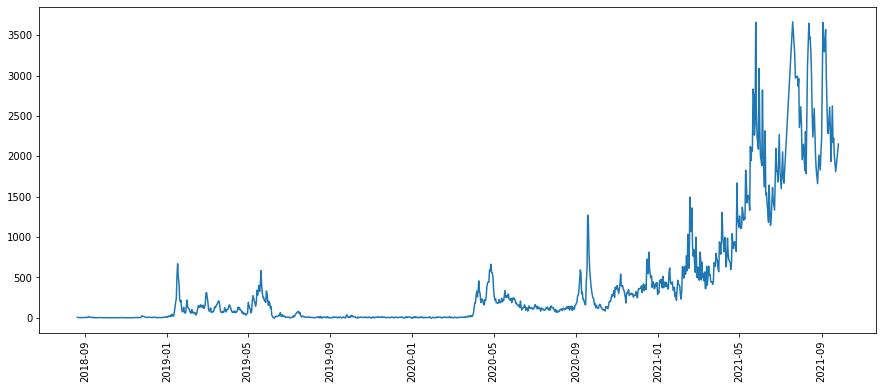

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(df['Date'],df['Subscribers'])
plt.xticks(rotation='vertical')
plt.show()

In [16]:
df.columns = ["ds","y"]

In [26]:
df.tail()

,ds,y
1094,2021-09-18,2173.0
1095,2021-09-19,2222.0
1096,2021-09-20,1997.0
1097,2021-09-22,1809.0
1098,2021-09-26,2152.0


In [20]:
model = Prophet()
model = model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
future = model.make_future_dataframe(periods=630,freq='D')
forecast = model.predict(future)

In [27]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1724,2023-06-14,8443.228536,7344.518398,9457.417424,7411.026187,9425.120566,-64.408217,-64.408217,-64.408217,4.981415,4.981415,4.981415,-69.389632,-69.389632,-69.389632,0.0,0.0,0.0,8378.820320
1725,2023-06-15,8452.379442,7263.609032,9422.927392,7418.260535,9439.424016,-92.115519,-92.115519,-92.115519,-2.254944,-2.254944,-2.254944,-89.860575,-89.860575,-89.860575,0.0,0.0,0.0,8360.263923
1726,2023-06-16,8461.530348,7300.714137,9390.847916,7425.603591,9453.727467,-94.285746,-94.285746,-94.285746,13.643130,13.643130,13.643130,-107.928876,-107.928876,-107.928876,0.0,0.0,0.0,8367.244602
1727,2023-06-17,8470.681254,7281.185701,9379.249784,7432.967121,9468.030917,-117.461588,-117.461588,-117.461588,5.982139,5.982139,5.982139,-123.443727,-123.443727,-123.443727,0.0,0.0,0.0,8353.219666
1728,2023-06-18,8479.832160,7264.254907,9364.707415,7440.330651,9480.946821,-140.798993,-140.798993,-140.798993,-4.497985,-4.497985,-4.497985,-136.301008,-136.301008,-136.301008,0.0,0.0,0.0,8339.033166


In [23]:
forecast['yhat'].sum()

3946159.672731893

In [28]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [29]:
plot_components_plotly(model, forecast)